In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import SGD

In [8]:
df=pd.read_csv("tesla_stocks.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [9]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3296,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
3297,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
3298,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900
3299,2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200


In [15]:
close_prices = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)

In [19]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_close, time_steps)

In [21]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
model = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(time_steps, 1)),
    Dense(1)
])

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9467e-04 - val_loss: 0.0485
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2438e-04 - val_loss: 0.0345
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8700e-04 - val_loss: 0.0299
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4017e-04 - val_loss: 0.0280
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3524e-04 - val_loss: 0.0268
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5225e-04 - val_loss: 0.0260
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6843e-04 - val_loss: 0.0259
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4062e-04 - val_loss: 0.0255
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4715e-04 - val_loss: 0.0251
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1539e-04 - val_loss: 0.0242
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4585e-04 - val_loss: 0.0241
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s

In [23]:
y_pred = model.predict(X_test)
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


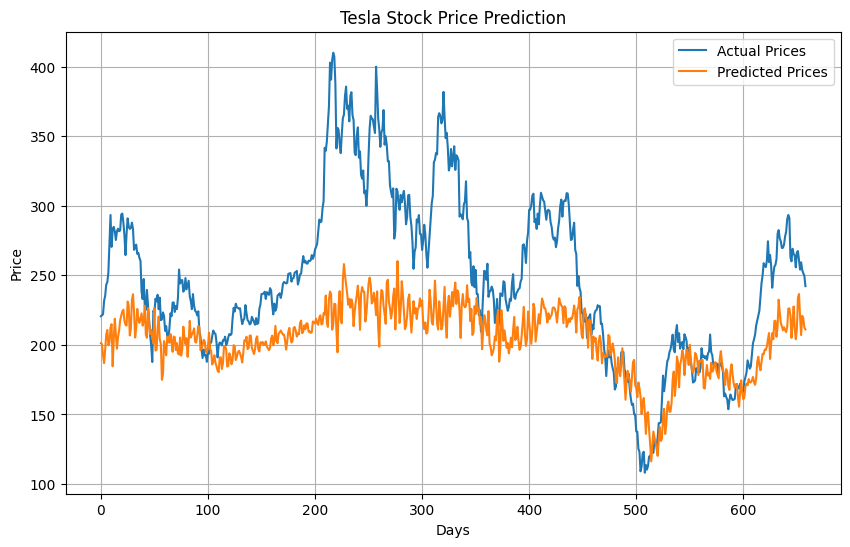

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(y_pred_actual, label='Predicted Prices')
plt.title("Tesla Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()